In [1]:
import pandas as pd

# Read excel file with sheet name
df = pd.read_excel("c:\\users\\labdh\\Omnify_Assessment\\Omnify-Analyst-Intership-Task.xlsx", sheet_name=['Google Ads Data','Listing Site Data'])


In [2]:
List_df = df.get('Listing Site Data')

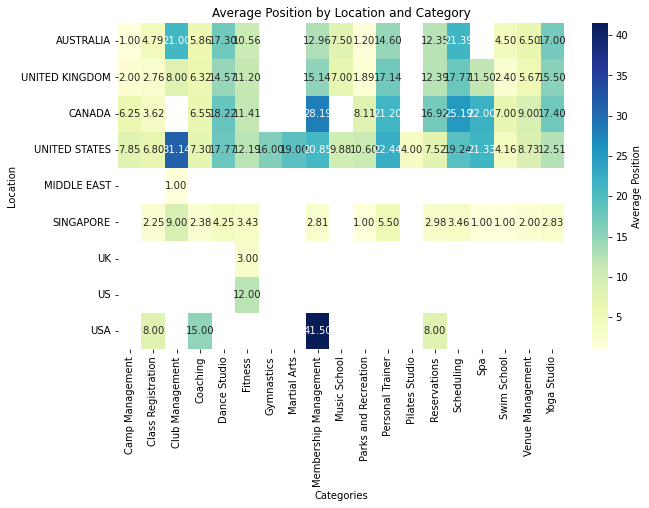

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
List_df['Date of Report'] = pd.to_datetime(List_df['Date of Report'])

# Convert the 'MoneySpent' column to numeric (remove the currency symbol if present and convert to float)
List_df['Money Spent ($)'] = List_df['Money Spent ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert the 'Location' column to uppercase for consistency
List_df['Location'] = List_df['Location'].str.upper()

# Create a pivot table to calculate the average position for each category in each location
pivot_table = List_df.pivot_table(index='Location', columns='Categories', values='Average Position', aggfunc='mean')

# Sort the pivot table by average position in ascending order
pivot_table_sorted = pivot_table.sort_values(by=pivot_table.columns[0], ascending=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_sorted, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Average Position'})
plt.title('Average Position by Location and Category')
plt.xlabel('Categories')
plt.ylabel('Location')
plt.show()

In [5]:
import plotly.express as px
List_df['Date of Report'] = pd.to_datetime(List_df['Date of Report'])
List_df['Money Spent ($)'] = List_df['Money Spent ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
List_df['Location'] = List_df['Location'].str.upper()
avg_position_by_location =List_df.groupby('Location')['Average Position'].mean().reset_index()
fig = px.choropleth(avg_position_by_location, 
                    locations='Location', 
                    locationmode='country names',
                    color='Average Position',
                    hover_name='Location',
                    color_continuous_scale='YlGnBu',
                    projection='natural earth')
fig.update_layout(title='Average Position of Products/Services by Location',
                  geo=dict(showcoastlines=True, showland=True, showlakes=True, showcountries=True))
fig.show()